<a href="https://colab.research.google.com/github/mirpouya/Image-Classification/blob/main/Image_Classification_Using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [3]:
# downloading kaggle dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 224MB/s]


In [4]:
# importing required libraries

import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  import sys


In [5]:
# the dataset is downloaded in zip format
# we need to unzip it 

file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
# we need to devide our data into train and test 
# chaning the directory to "yes" folder
os.chdir('/content/yes')

# stroring data into x and y to feed into model
X = []
y = []

# tqdm shows progress bars

for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      #print(i[0:1])

# changing directory to no folder
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('N')
# for i in range(1,99):
#     y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

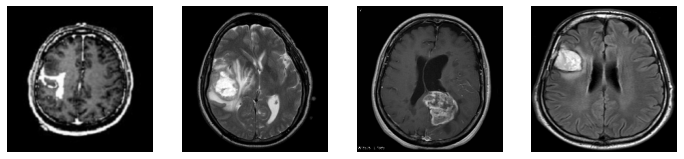

In [7]:
# plotting some of our dataset

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))

for i in range(4):
  plt.subplot(1,4, i+1)
  plt.imshow(X[i], cmap="gray")
  plt.axis("off")

plt.show()

In [8]:
# split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in y_train: ", len(y_train))
print ("Shape of an image in X_test: ", X_test[0].shape)
print ("Shape of an image in y_test: ", len(y_test))

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in y_train:  177
Shape of an image in X_test:  (224, 224, 3)
Shape of an image in y_test:  76


In [9]:
# converting string classes into numeric format
le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [11]:
# converting data into numpy array

y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [12]:
# cheking the dimensions 

print("X_train Shape: ", X_train.shape) 
print("y_train Shape: ", y_train.shape)

print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (177, 224, 224, 3)
y_train Shape:  (177, 2)
X_test Shape:  (76, 224, 224, 3)
y_test Shape:  (76, 2)


In [13]:
# building our model

# importing vgg16 network from keras
# we will use a pre-trained model
from keras.applications import vgg16

# defining shape of the input images
img_row, img_col = 224, 224

# loading the pre-trained model
# specifying what weights we need -> trained on imagenet dataset
# imagenet dataset comprised of 20,000 classes, here we have only two classes
# the top layers need to be adjusted
vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_row, img_col, 3))

# we freeze the last 4 layers 
# all layers originally are set to trainable as True 
# it means we are going to use pre-trained weights for this model
for layer in vgg.layers:
    layer.trainable = False

# see what's inside out network
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58900480/58889256 [==============================] - 1s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [14]:
# previous model was our base model
# we are going to add some top layers

# builing top model on to of our base model

from keras.layers import GlobalAveragePooling2D

def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model 

In [15]:
# creating our final model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [17]:
# fitting the model
history = model.fit(X_train,y_train,
                    epochs=15, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/15
6/6 [==============================] - 18s 833ms/step - loss: 5.8898 - accuracy: 0.5480 - val_loss: 1.4658 - val_accuracy: 0.4079
Epoch 2/15
6/6 [==============================] - 1s 210ms/step - loss: 1.1608 - accuracy: 0.6271 - val_loss: 0.5155 - val_accuracy: 0.7500
Epoch 3/15
6/6 [==============================] - 1s 209ms/step - loss: 0.5188 - accuracy: 0.7797 - val_loss: 0.4390 - val_accuracy: 0.7763
Epoch 4/15
6/6 [==============================] - 1s 209ms/step - loss: 0.2713 - accuracy: 0.8870 - val_loss: 0.3139 - val_accuracy: 0.8289
Epoch 5/15
6/6 [==============================] - 1s 209ms/step - loss: 0.1922 - accuracy: 0.9492 - val_loss: 0.2829 - val_accuracy: 0.8947
Epoch 6/15
6/6 [==============================] - 1s 209ms/step - loss: 0.1042 - accuracy: 0.9718 - val_loss: 0.3021 - val_accuracy: 0.8684
Epoch 7/15
6/6 [==============================] - 1s 212ms/step - loss: 0.0830 - accuracy: 0.9605 - val_loss: 0.4583 - val_accuracy: 0.8421
Epoch 8/15
6/6 [===

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
epochs = range(len(acc))

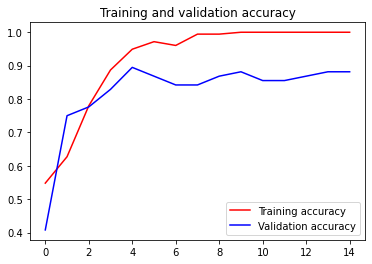

<Figure size 432x288 with 0 Axes>

In [20]:
# plotting loss and accuracy by time

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()